<a href="https://colab.research.google.com/github/RitwickSV/Neural-Networks/blob/main/Boston_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary packages

In [1]:
import numpy as np
from keras import models, layers
from keras.datasets import boston_housing

# Importing the data

In [2]:
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


# Understanding the input

In [3]:
print(train_data.shape)
print(test_data.shape)
print(train_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

# Normalize the data

In [4]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

# Model definition

We will be using 2 hidden layers with 64 units each and use the relu activation for the hidden layers.

The output layer will just contain one unit since this is a regression problem and we will not be using any activation function on the output.

In [8]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

# Cross Validation

This k fold validation can be used when the data that we have is too small. 

In [14]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_mae_histories = []
for i in range(k):
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],axis = 0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, validation_data = (val_data, val_targets), batch_size = 1, verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)




In [15]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Validatoin Mean Absolute Error')

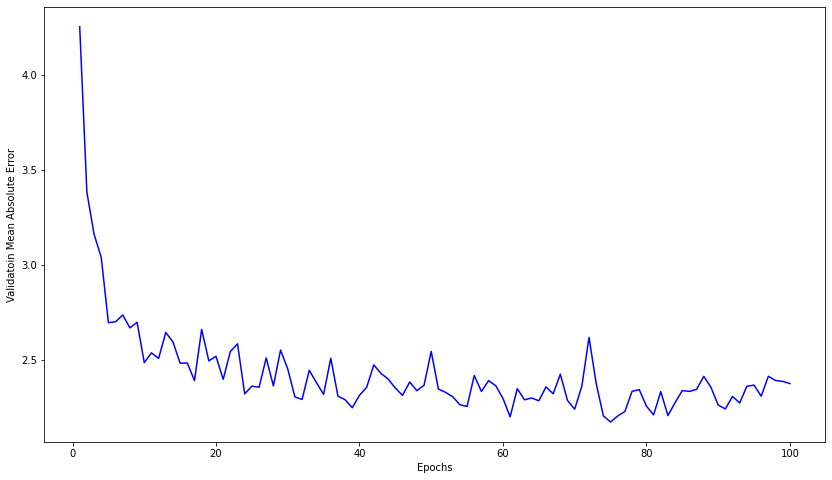

In [17]:
epochs = range(1,len(average_mae_history)+1)
plt.figure(figsize = (14,8))
sns.lineplot(x = epochs, y = average_mae_history, color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Validatoin Mean Absolute Error')

# Evaluation

Let's train the final model with epoch is 80

In [18]:
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 16.2788 - mae: 2.5238
2.523766040802002
